## Final Project Submission

- Student name: Jack Locke
- Student pace: Self-paced
- Instructor name: Mark Barbour

# H1N1 Flu Data Analysis

## Overview

- 1. Business Understanding
- 2. Data Understanding
- 3. Data Preparation
    - a. Merging Datasets
    - b. Dropping Unnecessary Columns
    - c. Handle Missing Values
    - d. Column Manipulation
    - e. Primary Column Information
- 4. Exploratory Data Analysis
    - a. Doctor Reccommendation vs. H1N1
    - b. Health Worker vs. H1N1
    - c. Opionion on Risk vs. H1N1
- 5. Modeling
    - a. Train, Validation, Holdout splits
    - b. Encoding Categorical Columns
    - c. Evaluation Metrics
    - d. Three Baseline Models
        - Logistic Regression
        - Decision Tree Classifier
        - Random Forest Classifier
    - e. Hyperparameter Tuning Best Model
    - f. Final Model
    - g. Adjusting Decision Threshold
- 6. Conclusions
    - a. Limitations
    - b. Recommendations
- 7. Next Steps

## Business Understanding

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
vaccine = pd.read_csv('data/training_set_features.csv')
vaccine.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
vaccine_label = pd.read_csv('data/training_set_labels.csv')
vaccine_label.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


## Data Preparation

#### Merging Datasets

In [4]:
vaccine = vaccine.merge(vaccine_label, on='respondent_id')

In [ ]:
vaccine.head()

#### Drop Unnecessary Columns

In [5]:
vaccine.drop(columns=['seasonal_vaccine','respondent_id', 'doctor_recc_seasonal','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc',
                     'employment_industry','employment_occupation','h1n1_knowledge','behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask','behavioral_outside_home',
                     'behavioral_touch_face','chronic_med_condition','rent_or_own','health_insurance'], inplace=True)

#### Handling Missing Values

In [6]:
vaccine['doctor_recc_h1n1'] = vaccine['doctor_recc_h1n1'].fillna(0.0)

In [7]:
vaccine['income_poverty'] = vaccine['income_poverty'].fillna('<= $75,000, Above Poverty')

In [8]:
vaccine = vaccine.dropna(how='any',axis=0)

#### Column Manipulation

In [9]:
vaccine['household_adults'] = vaccine['household_adults'].apply(lambda x: 'other adults' if x >= 1 else 'no other adults')
vaccine['household_children'] = vaccine['household_children'].apply(lambda x: 'children' if x >= 1 else 'no children')

#### Primary Column Information

In [10]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24658 entries, 0 to 26706
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 24658 non-null  float64
 1   behavioral_wash_hands        24658 non-null  float64
 2   behavioral_large_gatherings  24658 non-null  float64
 3   doctor_recc_h1n1             24658 non-null  float64
 4   child_under_6_months         24658 non-null  float64
 5   health_worker                24658 non-null  float64
 6   opinion_h1n1_vacc_effective  24658 non-null  float64
 7   opinion_h1n1_risk            24658 non-null  float64
 8   opinion_h1n1_sick_from_vacc  24658 non-null  float64
 9   age_group                    24658 non-null  object 
 10  education                    24658 non-null  object 
 11  race                         24658 non-null  object 
 12  sex                          24658 non-null  object 
 13  income_poverty       

In [11]:
vaccine['h1n1_vaccine'].value_counts(normalize=True)

h1n1_vaccine
0    0.785303
1    0.214697
Name: proportion, dtype: float64

In [12]:
vaccine['doctor_recc_h1n1'].value_counts()

doctor_recc_h1n1
0.0    19583
1.0     5075
Name: count, dtype: int64

In [13]:
vaccine['health_worker'].value_counts()

health_worker
0.0    21875
1.0     2783
Name: count, dtype: int64

In [15]:
vaccine['opinion_h1n1_risk'].value_counts()

opinion_h1n1_risk
2.0    9439
1.0    7544
4.0    5119
5.0    1637
3.0     919
Name: count, dtype: int64

## Exploratory Data Analysis

In [17]:
def bar_graph(x,y,df,title,xlabel,ylabel):

    plt.figure(figsize=(14, 6))

    ax1 = sns.barplot(x=x,  y=y, data=df, color='darkblue')

    ax1.bar_label(ax1.containers[0],size=16)
    # show the graph

    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize=18)
    plt.ylabel(ylabel,fontsize=18)
    plt.tick_params(axis='y',labelsize=16)
    plt.tick_params(axis='x',labelsize=16)
    plt.show()

#### Doctor Recommendation vs. H1N1

In [18]:
doc_rec = vaccine[vaccine['doctor_recc_h1n1']==1].groupby('h1n1_vaccine')[['doctor_recc_h1n1']].count().sort_values(by='doctor_recc_h1n1',
                                                                                              ascending=False)

In [19]:
doc_rec.reset_index(inplace=True)

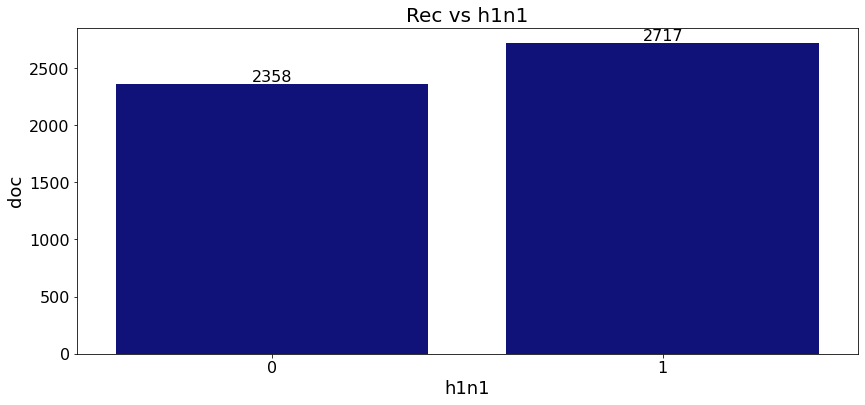

In [20]:
bar_graph('h1n1_vaccine','doctor_recc_h1n1',doc_rec,'Rec vs h1n1', 'h1n1', 'doc')

#### Health Worker vs. H1N1

In [21]:
health_work = vaccine[vaccine['health_worker'] == 1].groupby('h1n1_vaccine')[['health_worker']].count().sort_values(by='health_worker',
                                                                                              ascending=False)

In [22]:
health_work.reset_index(inplace=True)

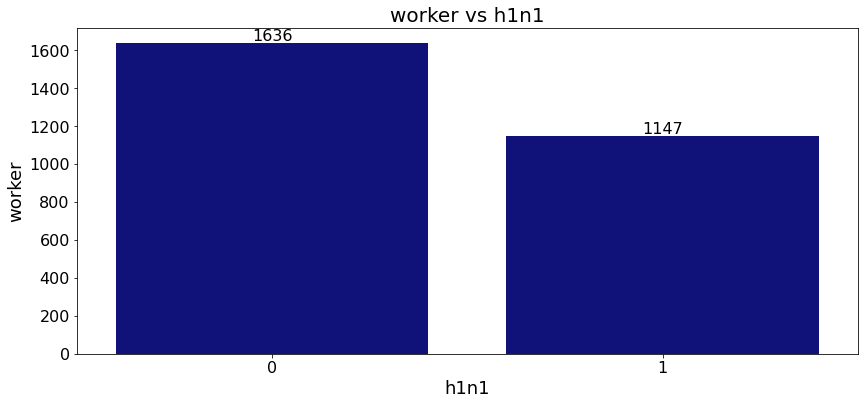

In [23]:
bar_graph('h1n1_vaccine','health_worker',health_work,'worker vs h1n1', 'h1n1', 'worker')

#### Opinion on Risk vs. H1N1

In [24]:
risk = vaccine.copy()

In [25]:
risk = risk[risk['opinion_h1n1_risk']!=3.0]

In [26]:
risk['opinion_h1n1_risk'] = risk['opinion_h1n1_risk'].apply(lambda x: 'high risk' if x > 3 else 'low risk')

In [27]:
risk = risk[risk['h1n1_vaccine']==1].groupby('opinion_h1n1_risk')[['h1n1_vaccine']].count().sort_values(by='h1n1_vaccine',
                                                                                              ascending=False)

In [28]:
risk.reset_index(inplace=True)

In [29]:
risk['opinion_h1n1_risk'] = risk['opinion_h1n1_risk'].astype(str)

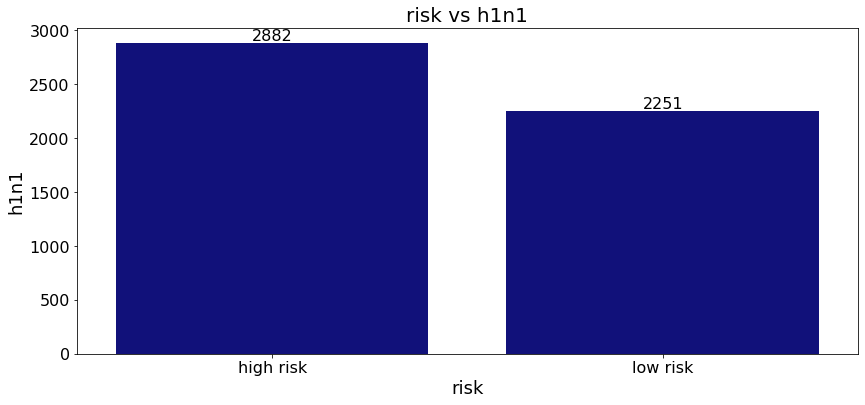

In [30]:
bar_graph('opinion_h1n1_risk','h1n1_vaccine', risk, 'risk vs h1n1', 'risk', 'h1n1')

## Model

#### Train, Validation, Holdout Splits

In [31]:
# Define our X and y
X = vaccine.drop(columns = ['h1n1_vaccine'], axis=1)
y = vaccine['h1n1_vaccine']

In [32]:
X_train_all, X_hold_out, y_train_all, y_hold_out = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42, stratify=y_train_all)

In [34]:
print("Train percent:", y_train.value_counts(normalize=True)[1])
print("Valid percent: ", y_valid.value_counts(normalize=True)[1])
print("Hold percent: ", y_hold_out.value_counts(normalize=True)[1])

Train percent: 0.21472427195403593
Valid percent:  0.21468799279116918
Hold percent:  0.21451743714517438


#### Encoding Categorical Columns

In [35]:
encoded_cols = []

for col in vaccine.columns:
    if vaccine[col].dtype == 'O':
        encoded_cols.append(col)
        
encoded_cols

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children']

In [36]:



def encoding(data):

    encoded_vaccine = pd.DataFrame()

    for col in encoded_cols:
    
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

        ohe.fit(data[[col]])

        vaccine_ohe = pd.DataFrame(
            ohe.transform(data[[col]]),
            index= data.index,
            columns=np.hstack(ohe.categories_)
        )
    
        col_dict = {}
        for col in vaccine_ohe.columns:
            col_dict[col] = vaccine_ohe[col].sum()
    
    
        
        minimum = [k for k,v in col_dict.items() if v == min(col_dict.values())]
    
    
        vaccine_ohe.drop(columns=minimum, inplace = True)
    
    
        encoded_vaccine = pd.concat([encoded_vaccine,vaccine_ohe], axis=1)
        

    data.drop(columns=encoded_cols,inplace = True)
    data = pd.concat([data, encoded_vaccine],axis=1)   

    return data

In [37]:
X_train = encoding(X_train)
X_valid = encoding(X_valid)
X_hold_out = encoding(X_hold_out)

<ipython-input-36-92b84198f726>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=encoded_cols,inplace = True)
<ipython-input-36-92b84198f726>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=encoded_cols,inplace = True)
<ipython-input-36-92b84198f726>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=encoded_cols,inplace = True)


#### Evaluation Metrics

In [43]:
def metrics_cv(cross_val_recall, cross_val_f1, model_type, data):
    print(f"{model_type} {data} cross validation scores:")
    print('\n')
    print("Recall scores - ")
    print(f"Average Train Score: {np.mean(cross_val_recall['train_score'])}")
    print(f"Average Test Score: {np.mean(cross_val_recall['test_score'])}")
    print('\n')
    print('F1 scores -')
    print(f"Average Train Score: {np.mean(cross_val_f1['train_score'])}")
    print(f"Average Test Score: {np.mean(cross_val_f1['test_score'])}")

#### Three Baseline Binary Classification Models

##### Logistic Regression

In [44]:

# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state = 42)
baseline_model.fit(X_train,y_train)


# Use cross_val_score with scoring="recall" or "f1" to evaluate the model
# on X_train and y_train

baseline_recall_logreg = cross_validate(baseline_model, X_train, y_train, scoring="recall", return_train_score=True)
baseline_f1_logreg = cross_validate(baseline_model, X_train, y_train, scoring="f1", return_train_score=True)


metrics_cv(baseline_recall_logreg,baseline_f1_logreg, 'Logistic Regression', 'X_train')

/Users/jacklocke/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jacklocke/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Logistic Regression X_train cross validation scores:


Recall scores - 
Average Train Score: 0.4256954336009119
Average Test Score: 0.4234053312143322


F1 scores -
Average Train Score: 0.5274303267487583
Average Test Score: 0.5234028044076305


/Users/jacklocke/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jacklocke/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

##### Decision Tree Classifier

In [47]:

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Use cross_val_score with scoring="recall" or "f1" to evaluate the model
# on X_train and y_train
baseline_recall_dt = cross_validate(dt, X_train, y_train, scoring="recall", return_train_score=True)
baseline_f1_dt = cross_validate(dt, X_train, y_train, scoring="f1",return_train_score=True)

metrics_cv(baseline_recall_dt,baseline_f1_dt, 'Decision Tree Classifier', 'X_train')


Decision Tree Classifier X_train cross validation scores:


Recall scores - 
Average Train Score: 0.9961962696718623
Average Test Score: 0.48190214755265687


F1 scores -
Average Train Score: 0.9980944611990589
Average Test Score: 0.4597256704912683


##### Random Forest Classifier

In [48]:


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

baseline_recall_rfc = cross_validate(rfc, X_train, y_train, scoring="recall", return_train_score=True)
baseline_f1_rfc = cross_validate(rfc, X_train, y_train, scoring="f1", return_train_score=True)


metrics_cv(baseline_recall_rfc, baseline_f1_rfc, 'Random Forest Classifier', 'X_train')


Random Forest Classifier X_train cross validation scores:


Recall scores - 
Average Train Score: 0.9970487717015523
Average Test Score: 0.40608662449303934


F1 scores -
Average Train Score: 0.9979318801200276
Average Test Score: 0.5097050874498735


#### Hyperparameter Tuning on Best Model

In [537]:
param_grid = {
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
    "C" : [1, 0.1, 0.01,.001], # regularization parameter
    "class_weight": ['balanced', None],
    "max_iter" : [100,200,500]
}

In [538]:
grid = GridSearchCV(baseline_model, param_grid, scoring=['recall','f1'], refit='recall')

In [539]:
hypertune_model = grid.fit(X_train, y_train)

/Users/jacklocke/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jacklocke/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

/Users/jacklocke/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jacklocke/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [540]:
hypertune_model.best_params_

{'C': 0.001,
 'class_weight': 'balanced',
 'max_iter': 100,
 'solver': 'liblinear'}

In [49]:
logreg_model = LogisticRegression(max_iter=100, random_state=42,class_weight='balanced', C=.006,solver='liblinear')
logreg_model.fit(X_train,y_train)


# Use cross_val_score with scoring="recall" or "f1" to evaluate the model
# on X_train and y_train

recall_logreg = cross_validate(logreg_model, X_train, y_train, scoring="recall", return_train_score=True)
recall_logreg_val = cross_validate(logreg_model, X_valid, y_valid, scoring="recall", return_train_score=True)
f1_logreg = cross_validate(logreg_model, X_train, y_train, scoring="f1",return_train_score=True)
f1_logreg_val = cross_validate(logreg_model, X_valid, y_valid, scoring="f1",return_train_score=True)


metrics_cv(recall_logreg, f1_logreg, 'Logistic Regression', 'X_train')
print('\n')
metrics_cv(recall_logreg_val, f1_logreg_val, 'Logistic Regression', 'X_valid')

Logistic Regression X_train cross validation scores:


Recall scores - 
Average Train Score: 0.726062939206082
Average Test Score: 0.7224621004943189


F1 scores -
Average Train Score: 0.5650899341197051
Average Test Score: 0.5628035803761209


Logistic Regression X_valid cross validation scores:


Recall scores - 
Average Train Score: 0.7492107064598577
Average Test Score: 0.7397850647561311


F1 scores -
Average Train Score: 0.5529504686737281
Average Test Score: 0.547021965783988


#### Final Model

In [50]:
final_model = logreg_model
final_model.fit(X_train,y_train)

LogisticRegression(C=0.006, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [51]:
recall_score(y_hold_out, final_model.predict(X_hold_out))

0.718336483931947

In [52]:
f1_score(y_hold_out, final_model.predict(X_hold_out))

0.5608856088560885

#### Adjusting Decision Threshold

In [53]:
y_pred_new_threshold = (final_model.predict_proba(X_hold_out)[:, 1] >= 0.4).astype(int) 

In [54]:
print("Recall:  ", recall_score(y_hold_out, y_pred_new_threshold))
print("f1:  ", f1_score(y_hold_out, y_pred_new_threshold))

Recall:   0.8090737240075614
f1:   0.5080118694362018


In [55]:


# Print confusion matrix
cnf_matrix = confusion_matrix(y_hold_out, y_pred_new_threshold)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[1209  728]
 [ 101  428]]


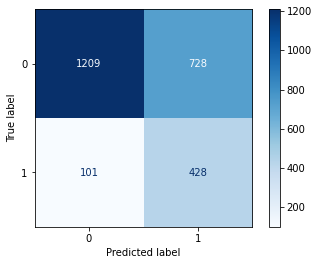

In [56]:


disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=final_model.classes_)
disp.plot(cmap=plt.cm.Blues)

## Conclusion

### Limitations

### Recommendations

## Next Steps